In [1]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, transpile, execute,assemble
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex
import matplotlib.pyplot as plt
import random
from qiskit.extensions import UnitaryGate
from numpyarray_to_latex.jupyter import to_jup
from QPCA.preprocessingUtilities.preprocessing_matrix_utilities import generate_matrix
from QPCA.quantumUtilities.quantum_utilities import thetas_computation,from_binary_tree_to_qcircuit,state_vector_tomography

# General use case of tomography 

Here we show that our tomography implementation can be used in general to estimate any quantum circuit' statevectors.

In [2]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

In [3]:
aer=Aer.get_backend('statevector_simulator')
statevector=aer.run(transpile(qc,aer)).result().get_statevector()
array_to_latex(statevector)

/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


<IPython.core.display.Latex object>

In [4]:
state_vector_tomography(qc,n_shots=8000,qubits_to_be_measured=[0])

{'0': 0.7101936355670896, '1': -0.7040063920164361}

We can specify the qubits that you want to reconstruct (or measure) and if drawing the circuit that implements the tomography

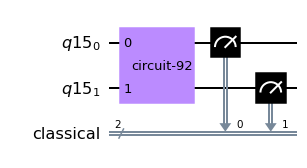

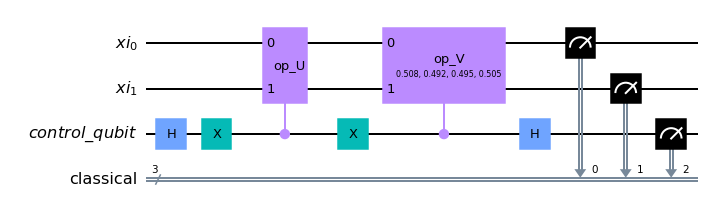

{'00': 0.5076908508137604,
 '01': -0.49168079075758087,
 '10': 0.4952272205765753,
 '11': -0.5052227231627651}

In [5]:
state_vector_tomography(qc,n_shots=8000,drawing_amplitude_circuit=True,drawing_sign_circuit=True)

# Qpca class usability

In [2]:
resolution=8
matrix_dimension=3
lista=list(range(0,2**resolution))
#eigenvalues_list=[0.65,0.25,0.06,0.04]


In [3]:
#4747
seed=900
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed)#,eigenvalues_list=eigenvalues_list)

Matrix:



<IPython.core.display.Math object>

eigenvalue: 0.05825170182999686 - eigenvector: [ 0.409 -0.735  0.541]
eigenvalue: 0.003030981753346985 - eigenvector: [-0.581  0.247  0.776]
eigenvalue: 1.1456672711010396 - eigenvector: [-0.704 -0.631 -0.326]


In [4]:
qpca=QPCA().fit(input_matrix,resolution=resolution)

In [5]:
orig_eigenvalue,orig_eigenvectors=np.linalg.eig(qpca.input_matrix)#,qpca.input_matrix

In [6]:
to_jup(qpca.input_matrix,fmt='{:3f}')

<IPython.core.display.Math object>

In [7]:
k = orig_eigenvalue.argsort()[::-1]   
orig_eigenvalue = orig_eigenvalue[k]
orig_eigenvectors = orig_eigenvectors[:,k]

In [8]:
to_jup(orig_eigenvalue,fmt='{:3f}'),to_jup(orig_eigenvectors,fmt='{:3f}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(None, None)

/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/tommasofioravanti/Desktop/Intesa/Quantum/Esperimenti/QuPCA/QPCA/postprocessingUtilities/postprocessing_eig_reconstruction.py:129: RuntimeWarning: invalid value encountered in divide
  scaled_statevectors.append(statevector[i:i+len_input_matrix]/max_list[e])


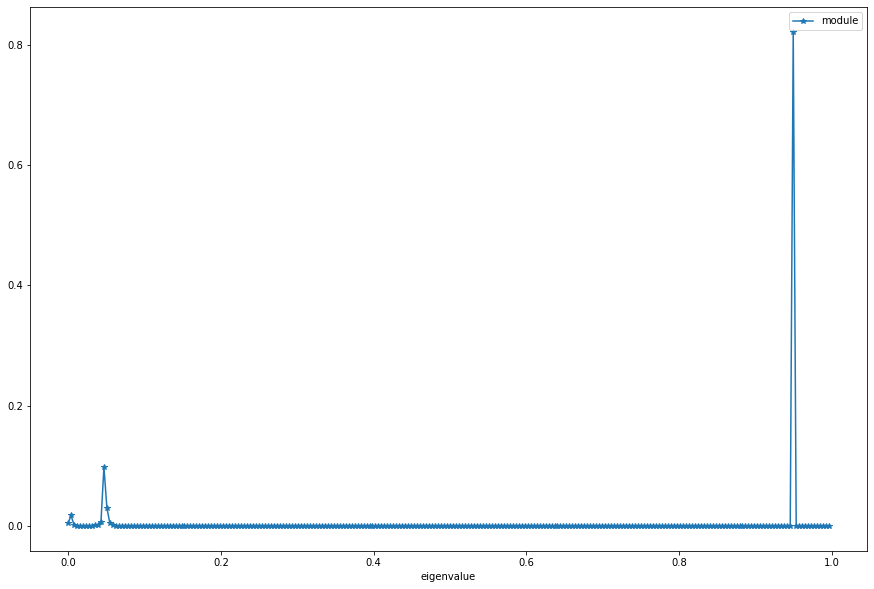

In [9]:
eigenvalues,eigenvectors=qpca.eigenvectors_reconstruction(n_shots=1000000,n_repetitions=1,plot_peaks=True)

In [10]:
k = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[k]
eigenvectors = eigenvectors[:,k]

In [11]:
to_jup(eigenvalues,fmt='{:3f}'),to_jup(eigenvectors,fmt='{:3f}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(None, None)

In [12]:
qpca.quantum_input_matrix_reconstruction()

array([[0.58679192, 0.49638236, 0.27529064],
       [0.49638236, 0.48633339, 0.21694231],
       [0.27529064, 0.21694231, 0.14039406]])

In [13]:
qpca.true_input_matrix,np.linalg.eig(qpca.input_matrix)

(array([[0.4793119 , 0.40689113, 0.2271525 ],
        [0.40689113, 0.40439972, 0.17641538],
        [0.2271525 , 0.17641538, 0.11628838]]),
 (array([0.94922517, 0.00251127, 0.04826356, 0.        ]),
  array([[-0.70395477, -0.58064408,  0.4090234 ,  0.        ],
         [-0.63118319,  0.24738171, -0.73512588,  0.        ],
         [-0.32566158,  0.77566406,  0.54063832,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])))